In [521]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [522]:
# Reading in the DataFrame
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [523]:
df.isnull().sum()  # Yooo!., no missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [524]:
df['left'].unique()

array([1, 0], dtype=int64)

In [525]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [526]:
# I want to try to extract a portion of the DataFrame consisiting of employees that did not leave the firm
# So I can get an inference on what variables to  use

df[df['left'] == 0]
# Here..,about 70% of employees have a high satisfaction rate
# Some Salaries are high even though not a very large fraction is ( so..,maybe I'll check for a portion of the DataFrame 
#  where the salaries are high..,let's see how it goes🥳)
# Promotions have  been awarded some employees also leading to more time being spent in the company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [527]:
# when salary is high
df[df['salary'] == 'high'].tail(20) # okay..,this isn't looking too sweet

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high
14283,0.45,0.49,2,149,3,0,1,0,product_mng,high
14322,0.09,0.85,6,289,4,0,1,0,hr,high
14400,0.44,0.51,2,156,3,0,1,0,technical,high
14478,0.45,0.53,2,129,3,0,1,0,technical,high
14517,0.37,0.46,2,149,3,0,1,0,marketing,high
14556,0.10,0.86,6,278,4,0,1,0,technical,high
14595,0.36,0.48,2,156,3,0,1,0,accounting,high


In [528]:
# what if promotion determines
df[df['promotion_last_5years'] == 1] # I giff up😒😒😒

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
82,0.79,0.59,4,139,3,0,1,1,management,low
171,0.41,0.46,2,160,3,0,1,1,sales,low
287,0.11,0.79,6,292,4,0,1,1,technical,low
584,0.41,0.56,2,154,3,0,1,1,support,medium
...,...,...,...,...,...,...,...,...,...,...
14229,0.45,0.51,2,160,3,1,1,1,sales,low
14293,0.79,0.59,4,139,3,0,1,1,management,low
14382,0.41,0.46,2,160,3,0,1,1,sales,low
14498,0.11,0.79,6,292,4,0,1,1,technical,low


In [529]:
df[df['Department'] == 'management'] #😢😢😢
# mmmhhhh.., wait ooo🤔🤔, low salaries😁💔💔 ( same with promotion above..,wow,wow,wow..,hehehe)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
60,0.85,0.91,5,226,5,0,1,0,management,medium
82,0.79,0.59,4,139,3,0,1,1,management,low
137,0.42,0.48,2,129,3,0,1,0,management,low
158,0.39,0.50,2,136,3,0,1,0,management,low
213,0.45,0.46,2,153,3,0,1,0,management,low
...,...,...,...,...,...,...,...,...,...,...
14805,0.10,0.77,6,255,4,0,1,0,management,low
14826,0.10,0.88,7,267,4,0,1,0,management,medium
14873,0.10,0.79,6,275,4,0,1,0,management,low
14928,0.44,0.52,2,141,3,0,1,0,management,low


In [530]:
# salary and promotion
# I should have known sef😏
high_sal_df = df[df['salary'] == 'high']
high_sal_df[high_sal_df['promotion_last_5years'] == 1]# yo🤸‍♀️🤸‍♀️🤸‍♀️
# satisfaction_level too though.., most employees in this portion have a high level of satisfaction in the Firm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
4509,0.55,0.48,3,162,3,0,0,1,management,high
4548,0.86,0.56,4,247,3,0,0,1,technical,high
4729,0.60,0.90,4,178,3,0,0,1,RandD,high
4732,0.70,0.64,4,178,3,1,0,1,marketing,high
4734,0.97,0.61,4,167,3,0,0,1,accounting,high
...,...,...,...,...,...,...,...,...,...,...
14205,0.22,0.94,3,193,10,0,0,1,management,high
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high


In [531]:
# oooouuchh..,my neckkk...
# found it now..,so muevving onn
# I feel like I've wasted soo much time😗

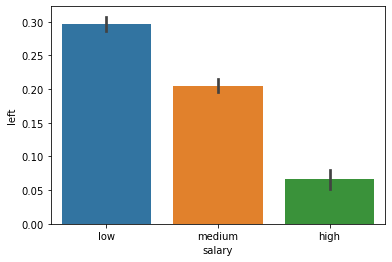

In [532]:
# impact of employees salaries on retention
sns.barplot(y = 'left', x = 'salary', data = df)

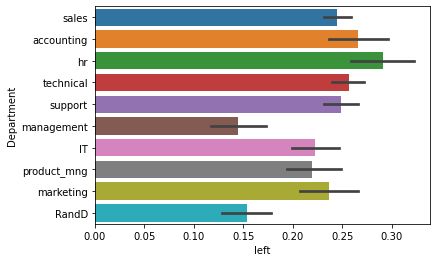

In [533]:
# Correlation between the departments of employees and Retention
sns.barplot(y = 'Department', x = 'left', data = df)

In [534]:
# Time to build my Logistic Regression Model
# before that..,the strings in df['salary'] should to be converted to numericalvalues
dum_df = pd.get_dummies(df['salary'])
dum_df

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [535]:
fin_df = pd.concat([df, dum_df], axis = 1)
fin_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [536]:
fin_df = fin_df.drop(['salary', 'medium'], axis = 1)
fin_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1
14995,0.37,0.48,2,160,3,0,1,0,support,0,1
14996,0.37,0.53,2,143,3,0,1,0,support,0,1
14997,0.11,0.96,6,280,4,0,1,0,support,0,1


In [537]:
# Preparing my sweet variables
X = fin_df[['satisfaction_level', 'promotion_last_5years', 'high', 'low']]
X

,satisfaction_level,promotion_last_5years,high,low
0,0.38,0,0,1
1,0.80,0,0,0
2,0.11,0,0,0
3,0.72,0,0,1
4,0.37,0,0,1
...,...,...,...,...
14994,0.40,0,0,1
14995,0.37,0,0,1
14996,0.37,0,0,1
14997,0.11,0,0,1


In [538]:
y = fin_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [539]:
# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [540]:
X_train

,satisfaction_level,promotion_last_5years,high,low
14646,0.41,0,0,1
520,0.87,0,0,1
2275,0.94,0,0,1
6752,0.83,0,0,0
13996,0.53,0,1,0
...,...,...,...,...
13123,0.52,0,0,1
3264,0.59,0,0,0
9845,0.69,0,0,0
10799,0.78,0,1,0


In [541]:
y_train

14646    1
520      1
2275     0
6752     0
13996    0
        ..
13123    0
3264     0
9845     0
10799    0
2732     0
Name: left, Length: 10049, dtype: int64

In [542]:
X_test

,satisfaction_level,promotion_last_5years,high,low
1670,0.44,0,0,0
13378,0.55,0,0,0
10233,0.72,0,0,0
4719,0.96,0,0,1
7003,0.96,0,0,1
...,...,...,...,...
244,0.89,0,0,1
12747,0.43,0,0,1
6022,0.77,0,1,0
13793,0.58,0,0,1


In [543]:
clf = LogisticRegression()
clf # baby is ready🐣

LogisticRegression()

In [544]:
clf.fit(X,y)

LogisticRegression()

In [545]:
list(clf.predict(X_test))
# so..,basically Employees will stay if they're satisfied,promoted and well-paid

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [546]:
clf.score(X_test, y_test)

0.7771717171717172